In [1]:
from matplotlib import pyplot as plt
from scipy import integrate
import seaborn as sns
import numpy as np

In [2]:
sns.set_style("white")

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Plot the relation between $M_x$ and $h$ when $J$ is fixed to 1 and $h$ varies from 0 to 2

In [4]:
npload = np.load('ising_mx_vs_h.npz')

In [5]:
h_list = npload['h_list']
mx_list = npload['mx_list']
energy_list = npload['energy_list']

In [6]:
# Analytical calculation of M_x for comparision
def calc_m_x(h, j=1):
    def calc_big_lambda(lambda_, k):
        return np.sqrt(1 + lambda_ ** 2 + 2 * lambda_ * np.cos(k))
    lambda_ = np.divide(j, 2 * h) # avoid zero division
    L_0 = 1 / np.pi * integrate.quad(lambda k: 1 / calc_big_lambda(lambda_, k), 0, np.pi)[0]
    L_1 = 1 / np.pi * integrate.quad(lambda k: 1 / calc_big_lambda(lambda_, k) * np.cos(k), 0, np.pi)[0]
    m_x = 1 / 2 * (L_0 + lambda_ * L_1)
    return m_x

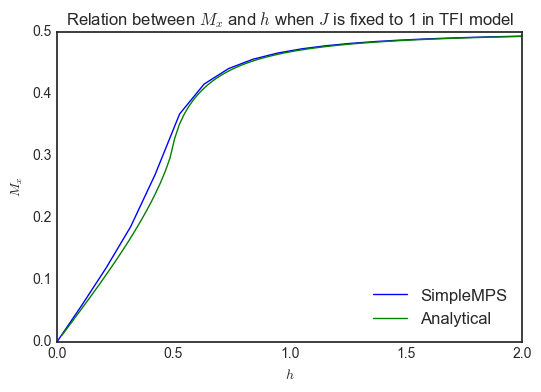

In [7]:
plt.plot(h_list, mx_list, label='SimpleMPS')
analytical_h_list = np.linspace(h_list.min(), h_list.max(), 100)
plt.plot(analytical_h_list, np.frompyfunc(calc_m_x, 1, 1)(analytical_h_list), label='Analytical')
plt.xlabel('$h$')
plt.ylabel('$M_x$')
plt.title('Relation between $M_x$ and $h$ when $J$ is fixed to 1 in TFI model')
plt.legend(loc='lower right')
plt.savefig('ising1.png')
plt.show()

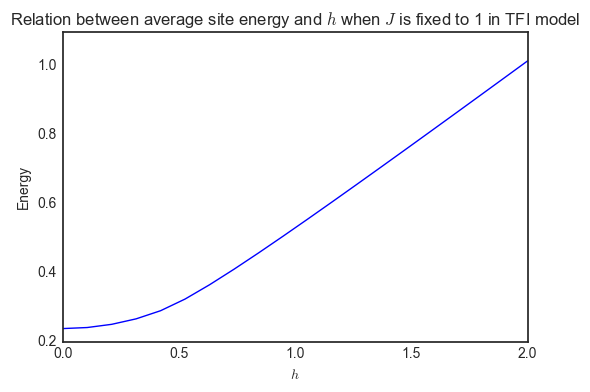

In [8]:
plt.plot(h_list, -energy_list)
plt.xlabel('$h$')
plt.ylabel('Energy')
plt.title('Relation between average site energy and $h$ when $J$ is fixed to 1 in TFI model')
plt.show()

## Plot the phase diagram

In [9]:
npload = np.load('ising_phase_diagram.npz')

In [10]:
mx_result = npload['mx_result']

In [11]:
mz_result = npload['mz_result']

In [12]:
j_grid = npload['j_grid']

In [13]:
h_grid = npload['h_grid']

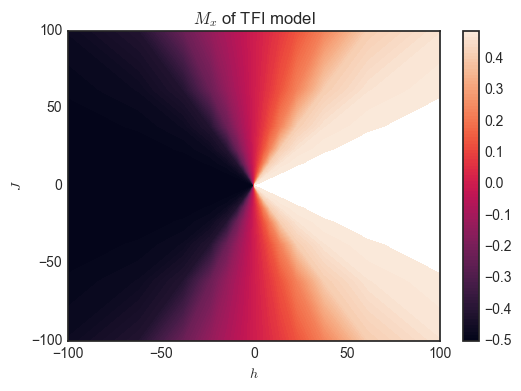

In [14]:
plt.contourf(j_grid, h_grid, mx_result, np.arange(-0.5, 0.5, 0.01))
plt.xlabel('$h$')
plt.ylabel('$J$')
plt.title('$M_x$ of TFI model')
plt.colorbar()
plt.savefig('ising2.png')
plt.show()

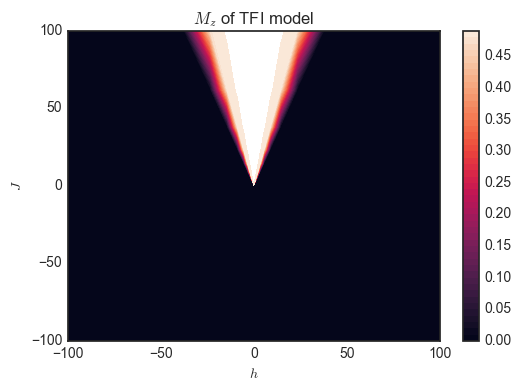

In [15]:
plt.contourf(j_grid, h_grid, np.abs(mz_result), np.arange(0, 0.5, 0.01)); 
plt.xlabel('$h$')
plt.ylabel('$J$')
plt.title('$M_z$ of TFI model')
plt.colorbar()
plt.show()

##  Appendix
- plot the energy curve for heisenberg model

In [16]:
energies = [0.947997520997407, 0.16372943175082844, -0.35902391055941896, -1.146324328008513, -1.8240852476474292, -2.56940199901001, -3.470840054781551, -4.109763733472468, -4.755290949292606, -5.595458214637118, -6.426529223032629, -7.1571136762064675, -7.749159411441465, -8.605051718061203, -9.217393228980171, -10.049781223489374, -10.04978122348938, -10.049781223489397, -10.049781223489358, -10.049781223489347, -10.04978122348935, -10.049781223489381, -10.049781223489374, -10.049781223489374, -10.049781223489395, -10.050388105487476, -10.051291278186497, -10.05153983891799, -10.051700713349241, -10.051823153870902, -10.051852613439573, -10.05199063550094, -10.052035794005329, -10.052107041332723, -10.052279766865027, -10.05228121405697, -10.052281214056904, -10.05228121405688, -10.052281214056928, -10.052281214056936]

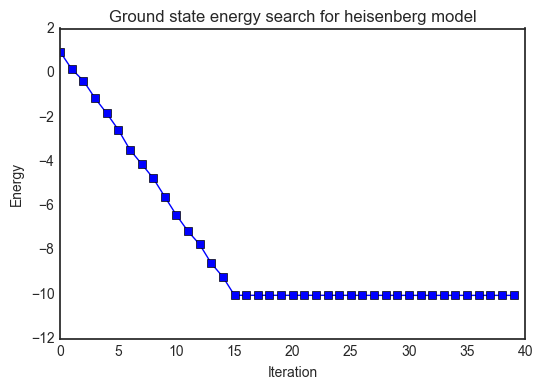

In [17]:
plt.plot(energies, marker='s'); 
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.title('Ground state energy search for heisenberg model')
plt.savefig('heisenberg.png')
plt.show()